<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/week9_over_under.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def seq_to_vec(seq, dim=10000):
  res = np.zeros((len(seq), dim))
  for i, s in enumerate(seq):
    res[i,s] = 1.
  return res

train_x = seq_to_vec(train_data)
test_x = seq_to_vec(test_data)

train_y = np.asarray(train_labels).astype("float32")
test_y = np.asarray(test_labels).astype("float32")

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# 오버피팅 해결하기
## Reducing the network's size

가장 간단하게 해결하는법은 모델 사이즈를 줄이는것이다. 딥러닝에서 훈련가능한 패러미터는 capacity라고 언급된다. 패러미터가 많을수록 모델은 자연스럽게 memorization capacity를 더 갖게된다. 딥러닝에서 가장 중요한것은 트레이닝에 피팅하는게 아니라 제너럴하게 피팅이 되게 하는것이다. 다른 말로 말해 네트워크가 제한된 메모라이제이션 자원을 갖는다면 매핑을 쉽게 배우지 못할것이다. 불행히도 어떤게 최적의 레이어 수인지 공식적으로 나온게 없다. 너는 평가해야 한다 다른 아키텍트를 적절한 모델 사이즈를 찾기 위해 검증셋으로 테스트 셋이 아니라! 가장 기본적인 방법은 적은 레이어에서 출발해 점점 늘려나가는것이다.

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

## Small model

In [4]:
smodel = models.Sequential()
smodel.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
smodel.add(layers.Dense(4, activation="relu"))
smodel.add(layers.Dense(1, activation="sigmoid"))

smodel.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [5]:
hist = model.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 5s 41ms/step - loss: 0.5637 - acc: 0.7267 - val_loss: 0.3421 - val_acc: 0.8818
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2793 - acc: 0.9077 - val_loss: 0.3052 - val_acc: 0.8778
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2041 - acc: 0.9307 - val_loss: 0.2816 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1625 - acc: 0.9446 - val_loss: 0.2958 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1431 - acc: 0.9526 - val_loss: 0.3122 - val_acc: 0.8774
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1236 - acc: 0.9605 - val_loss: 0.3394 - val_acc: 0.8727
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1075 - acc: 0.9650 - val_loss: 0.3490 - val_acc: 0.8732
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0945 - a

In [6]:
shist = smodel.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 3s 39ms/step - loss: 0.5977 - acc: 0.7442 - val_loss: 0.4440 - val_acc: 0.8606
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3861 - acc: 0.8903 - val_loss: 0.3475 - val_acc: 0.8799
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2860 - acc: 0.9111 - val_loss: 0.3032 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2371 - acc: 0.9225 - val_loss: 0.2916 - val_acc: 0.8851
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2018 - acc: 0.9333 - val_loss: 0.2907 - val_acc: 0.8823
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1790 - acc: 0.9408 - val_loss: 0.2803 - val_acc: 0.8892
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1584 - acc: 0.9480 - val_loss: 0.2845 - val_acc: 0.8862
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1400 - a

In [7]:
epochs = range(1, 21)
val_loss = hist.history["val_loss"]
s_val_loss = shist.history["val_loss"]


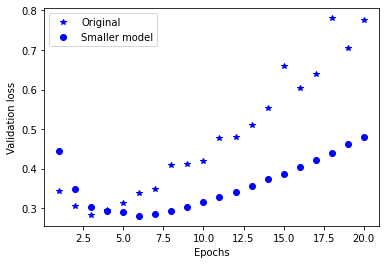

In [8]:
import matplotlib.pyplot as plt

plt.plot(epochs, val_loss, 'b*', label="Original")
plt.plot(epochs, s_val_loss, 'bo', label="Smaller model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

plt.show()

# Bigger model

In [9]:
bmodel = models.Sequential()
bmodel.add(layers.Dense(512, activation="relu", input_shape=(10000,)))
bmodel.add(layers.Dense(512, activation="relu"))
bmodel.add(layers.Dense(1, activation="sigmoid"))

bmodel.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [10]:
bhist = bmodel.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6004 - acc: 0.7122 - val_loss: 0.2846 - val_acc: 0.8846
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2314 - acc: 0.9082 - val_loss: 0.4719 - val_acc: 0.8022
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1450 - acc: 0.9445 - val_loss: 0.3351 - val_acc: 0.8849
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0666 - acc: 0.9794 - val_loss: 0.3538 - val_acc: 0.8756
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0339 - acc: 0.9927 - val_loss: 0.4556 - val_acc: 0.8823
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0033 - acc: 0.9997 - val_loss: 0.6711 - val_acc: 0.8802
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0310 - acc: 0.9970 - val_loss: 0.6241 - val_acc: 0.8791
Epoch 8/20
49/49 [==============================] - 2s 32ms/step - loss: 3.1516e-04

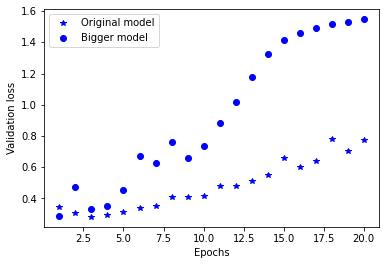

In [11]:
bloss = bhist.history["val_loss"]

plt.plot(epochs, val_loss, "b*", label="Original model")
plt.plot(epochs, bloss, "bo", label="Bigger model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

plt.show()


크기가 커질수록 train loss는 거의 바로 0으로 수렴

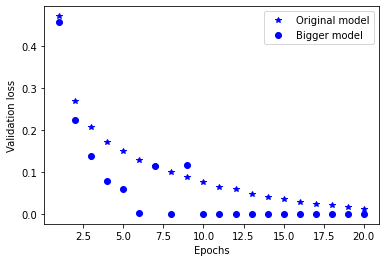

In [12]:
loss = hist.history["loss"]
bloss = bhist.history["loss"]

plt.plot(epochs, loss, "b*", label="Original model")
plt.plot(epochs, bloss, "bo", label="Bigger model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

plt.show()

## Adding weight regularization


You may be familiar with _Occam's Razor_ principle: given two explanations for something, the explanation most likely to be correct is the 
"simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some 
training data and a network architecture, there are multiple sets of weights values (multiple _models_) that could explain the data, and 
simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer 
parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity 
of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called 
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This 
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the 
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called 
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different 
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight 
regularization to our movie review classification network:

In [13]:
from tensorflow.keras import regularizers

l2model = models.Sequential()
l2model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000,)))
l2model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
l2model.add(layers.Dense(1, activation="sigmoid"))

In [14]:
l2model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

`l2(0.001)`은 레이어의 가중 행렬의 모든 상관 계수가 더한다는거다 `0.001 * weight_coefficient_value` 네트워크의 토탈 loss에.
이것은 단지 트레이닝 time에만 한정된다. 이 network의 loss는 test time 보다 training time에 더 크게된다.

In [15]:
l2model_hist = l2model.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5942 - acc: 0.7494 - val_loss: 0.3813 - val_acc: 0.8810
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3215 - acc: 0.9073 - val_loss: 0.3362 - val_acc: 0.8856
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2615 - acc: 0.9262 - val_loss: 0.3694 - val_acc: 0.8642
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2356 - acc: 0.9344 - val_loss: 0.3288 - val_acc: 0.8873
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2213 - acc: 0.9404 - val_loss: 0.3352 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2136 - acc: 0.9444 - val_loss: 0.3765 - val_acc: 0.8697
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2092 - acc: 0.9449 - val_loss: 0.3521 - val_acc: 0.8796
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2051 - a

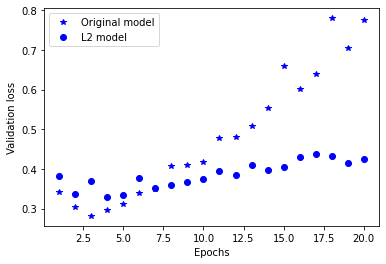

In [16]:
l2_val_loss = l2model_hist.history["val_loss"]
plt.plot(epochs, val_loss, "b*", label="Original model")
plt.plot(epochs, l2_val_loss, "bo", label="L2 model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

plt.show()

In [17]:
regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)


# Adding DropOut
Dropout은 가장 효과적인 규제 방법이다. 레이어에 적용되어 랜덤하게 아웃풋 피처들을 제거한다 트레이닝 시간에.대개 0.2 또는 0.5로 설정한다.

In [19]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [21]:
dpt_model_hist = dpt_model.fit(train_x,train_y,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_x, test_y))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.6236 - acc: 0.6437 - val_loss: 0.4280 - val_acc: 0.8649
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.4388 - acc: 0.8223 - val_loss: 0.3246 - val_acc: 0.8851
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3489 - acc: 0.8706 - val_loss: 0.2964 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2856 - acc: 0.9037 - val_loss: 0.2777 - val_acc: 0.8893
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2455 - acc: 0.9206 - val_loss: 0.2877 - val_acc: 0.8879
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2170 - acc: 0.9291 - val_loss: 0.2932 - val_acc: 0.8852
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2072 - acc: 0.9328 - val_loss: 0.3143 - val_acc: 0.8854
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1762 - a

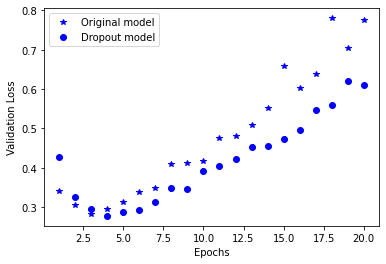

In [22]:
dpt_loss = dpt_model_hist.history["val_loss"]

plt.plot(epochs, val_loss, "b*", label="Original model")
plt.plot(epochs, dpt_loss, "bo", label="Dropout model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.